In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importing and preparing for temporal and spatial analysis

In [3]:
#Import CSV
all_df = pd.read_csv("utah_cali_all.csv", low_memory=False)

In [4]:
#Convert dates to datetime
all_df['Date Local'] = pd.to_datetime(all_df['Date Local'])

#Extract year and month from the date
all_df['year'] = all_df['Date Local'].dt.year
all_df['month'] = all_df['Date Local'].dt.month


In [5]:
#Rename column
all_df.rename(columns={'max_value':'AQI'},inplace=True)

In [6]:
all_df['State Name'].unique()

array(['Utah', 'California'], dtype=object)

In [7]:
all_df['County Name'].unique()

array(['Davis', 'Duchesne', 'Garfield', 'Grand', 'Iron', 'Salt Lake',
       'San Juan', 'Box Elder', 'Tooele', 'Uintah', 'Utah', 'Washington',
       'Wayne', 'Weber', 'Cache', 'Carbon', 'Daggett', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Alameda',
       'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Amador',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'Butte', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano',
       'Sonoma', 'Stanislaus', 'Calaveras'], dtype=object)

In [16]:
# Lists of California's and Utah's urban and rural counties
urban_counties = [
    'Davis', 'Salt Lake', 'Utah', 'Weber',
    'Ventura', 'Yolo', 'Contra Costa', 'El Dorado', 'Fresno', 'Alameda',
    'Kern', 'Los Angeles', 'Marin', 'Monterey', 'Orange', 'Placer',
    'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego',
    'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
    'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Solano', 'Sonoma',
    'Stanislaus'
]

rural_counties = [
    'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Colusa',
    'Del Norte', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kings',
    'Lake', 'Madera', 'Mariposa', 'Mendocino', 'Merced', 'Mono',
    'Napa', 'Nevada', 'Amador', 'Plumas', 'Butte', 'Shasta', 'Siskiyou',
    'Calaveras','Duchesne', 'Garfield', 'Grand', 'Iron', 'San Juan', 'Box Elder',
    'Tooele', 'Uintah', 'Wayne', 'Cache', 'Carbon', 'Daggett', 'Washington'
]


In [9]:
# Function to classify counties
def classify_county(county):
    if county in urban_counties:
        return 'urban'
    elif county in rural_counties:
        return 'rural'
    else:
        return 'unknown'  # For any county not in the lists

In [17]:
# Apply function to create new column with county classification
all_df['county_classification'] = all_df['County Name'].apply(classify_county)

In [8]:
# Define a function to determine the season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [9]:
# Apply the function to create a new column 'season'
all_df['season'] = all_df['Date Local'].apply(get_season)

In [10]:
# Convert data to numeric
all_df['PM2_5(µg/m³ LC)'] = pd.to_numeric(all_df['PM2_5(µg/m³ LC)'])
all_df['PM10 Tot_0-10um STP(μg/m3)'] = pd.to_numeric(all_df['PM10 Tot_0-10um STP(μg/m3)'])
all_df['Ozone(ppm)'] = pd.to_numeric(all_df['Ozone(ppm)'])
all_df['CO(ppm)'] = pd.to_numeric(all_df['CO(ppm)'])
all_df['SO2(ppb)'] = pd.to_numeric(all_df['SO2(ppb)'])
all_df['NO2(ppb)'] = pd.to_numeric(all_df['NO2(ppb)'])

In [11]:
#Create new dataframes, one for each state
cali_df = all_df[all_df['State Name'] == 'California']
utah_df = all_df[all_df['State Name'] == 'Utah']

### For this project, we decided to analyze the data from California only

In [12]:
#set color palette
colors =  ['#F17925', '#004753', '#CCAA14', '#4B4C4E', '#D82C20', ' #A3D0D4', '#536F18', '#46ABB0']

### Seasonal Analysis

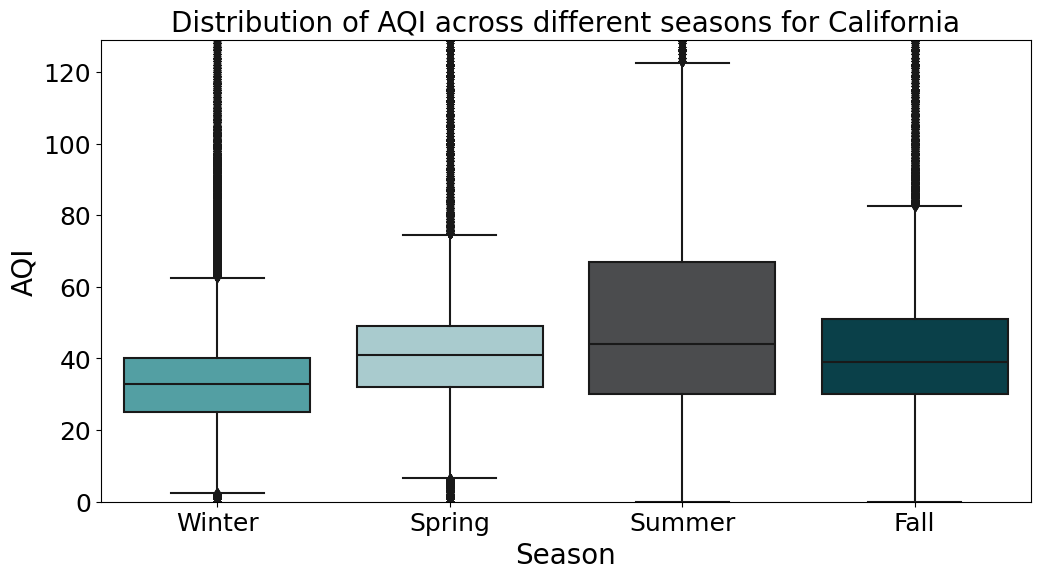

In [36]:
# Create a box plot with a specified y-axis limit for California
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='AQI', data=cali_df, palette=['#46ABB0', '#A3D0D4', '#4B4C4E', '#004753'])

# Adjust the y-axis limit to the 95th percentile
plt.ylim(0, all_df['AQI'].quantile(0.98))

# Add title
plt.title('Distribution of AQI across different seasons for California',fontsize=20)

#Set the tick parameters for larger tick labels
plt.tick_params(axis='both', which='major', labelsize=18)

# Add x-axis label
plt.xlabel('Season',fontsize=20)

# Add y-axis label
plt.ylabel('AQI',fontsize=20)

# Save chart
plt.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\AQI_seasons_boxplot.png")

plt.show()

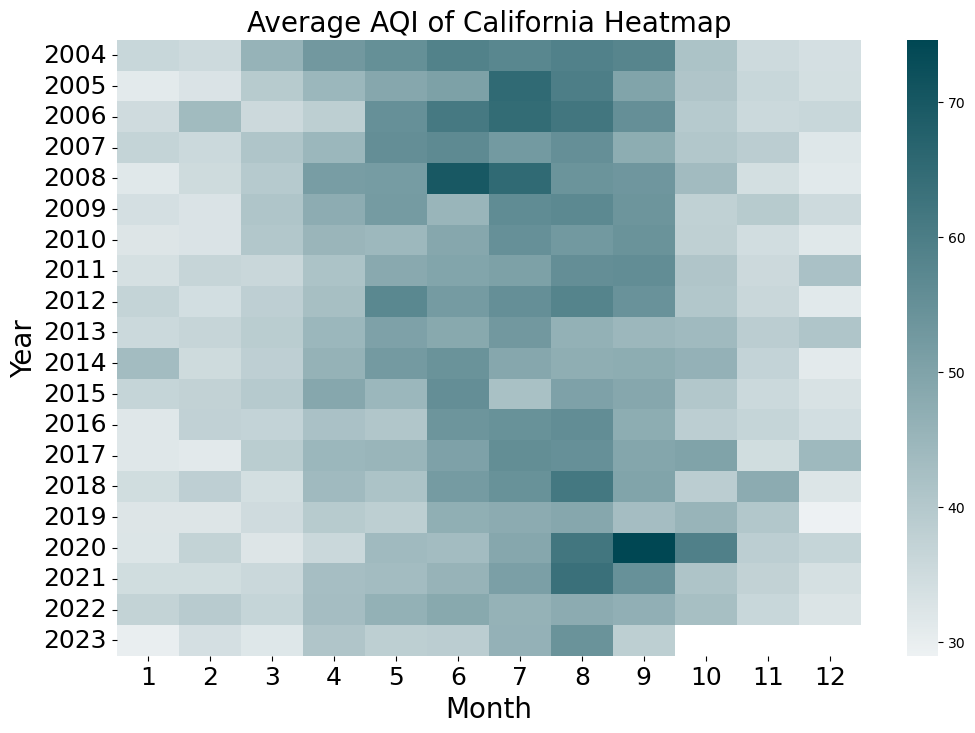

In [35]:
# Aggregate data to get the average AQI for each year and month  for California
avg_aqi = cali_df.groupby(['year', 'month'])['AQI'].mean().reset_index()

# Pivot the data to get years as rows and months as columns
heatmap_data = avg_aqi.pivot(index='year', columns='month', values='AQI')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap=sns.light_palette("#004753", as_cmap=True), fmt=".1f")

# Add title
plt.title('Average AQI of California Heatmap', fontsize=20)

#Set the tick parameters for larger tick labels
plt.tick_params(axis='both', which='major', labelsize=18)

# Add x-axis label
plt.xlabel('Month',fontsize=20)

# Add y-axis label
plt.ylabel('Year',fontsize=20)

# Save chart
plt.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\AQI_heatmap.png")

plt.show()

### Urban vs Rural counties analysis

In [13]:
# Group by county classification
cali_grouped_df = cali_df.groupby(['county_classification', cali_df['Date Local'].dt.year])['AQI'].mean().reset_index()

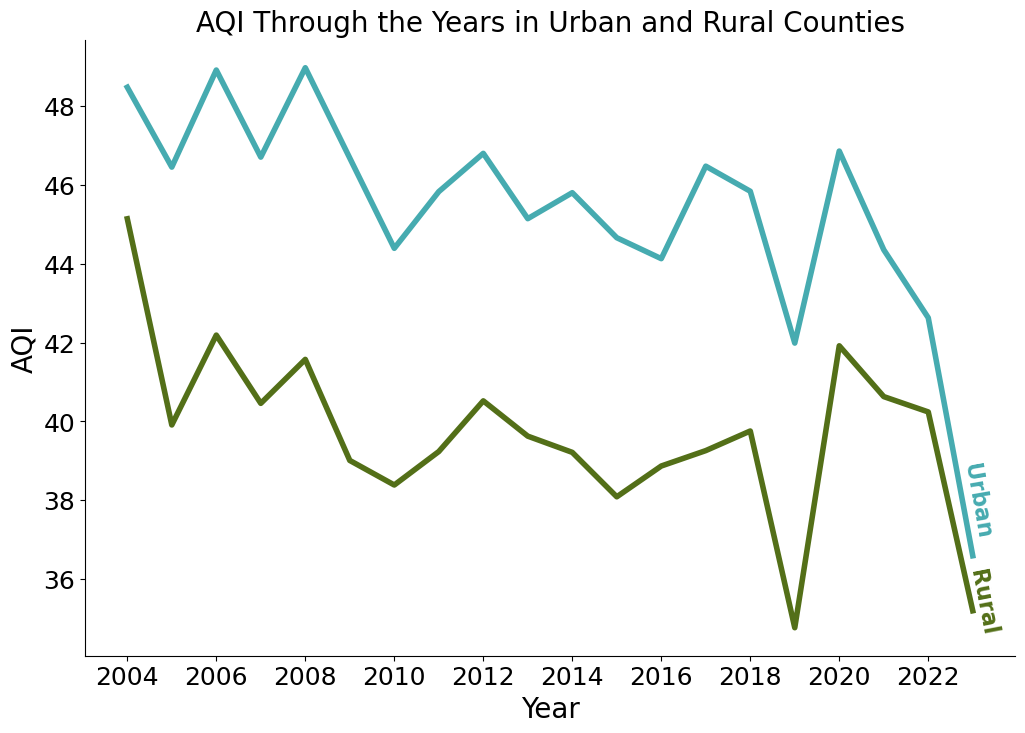

In [28]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
ax.plot(cali_grouped_df[cali_grouped_df['county_classification']=='rural']['Date Local'], cali_grouped_df[cali_grouped_df['county_classification']=='rural']['AQI'], label='Rural', color='#536F18', linewidth=4)
ax.plot(cali_grouped_df[cali_grouped_df['county_classification']=='urban']['Date Local'], cali_grouped_df[cali_grouped_df['county_classification']=='urban']['AQI'], label='Urban', color='#46ABB0', linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=2022.82, y=36.3, ax=ax, s="Rural", fontsize=16, fontweight="bold", va="top", ha="left", color='#536F18', rotation=281)
ax_text(x=2022.7, y=39, ax=ax, s="Urban", fontsize=16, fontweight="bold", va="top", ha="left", color='#46ABB0', rotation=280)

# Set x-axis ticks to be every 2 years
ax.set_xticks(np.arange(min(cali_grouped_df[cali_grouped_df['county_classification']=='rural']['Date Local']), max(cali_grouped_df[cali_grouped_df['county_classification']=='rural']['Date Local']) + 1, 2))

# Add y-axis label
ax.set_ylabel('AQI',fontsize=20)

# Add x-axis label
ax.set_xlabel('Year',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Add title
ax.set_title('AQI Through the Years in Urban and Rural Counties', fontsize=20)

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\AQI_urban_rural_line.png")

# Show the plot
plt.show()

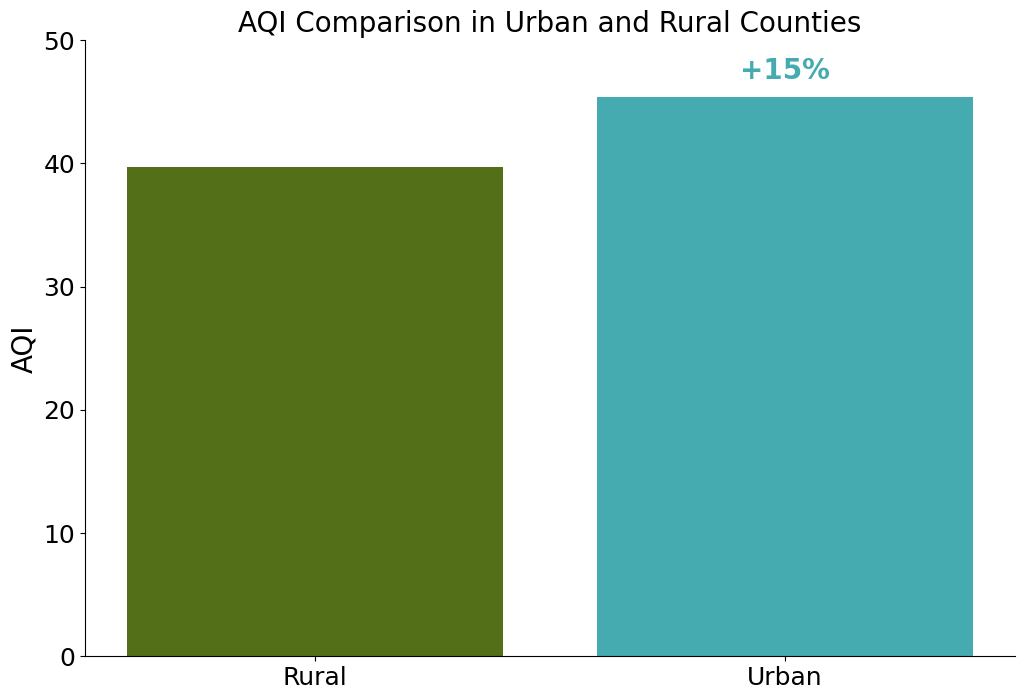

In [42]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
bars = ax.bar(cali_grouped_df.groupby('county_classification')['AQI'].mean().reset_index()['county_classification'], cali_grouped_df.groupby('county_classification')['AQI'].mean().reset_index()['AQI'], color=['#536F18','#46ABB0'], linewidth=4, width = 0.8)

# Add title
ax.set_title('AQI Comparison in Urban and Rural Counties',fontsize=20)

#Hide top and right line
ax.spines[["top", "right"]].set_visible(False)

# Set custom x-tick labels
ax.set_xticks(cali_grouped_df.groupby('county_classification')['AQI'].mean().reset_index()['county_classification'])
ax.set_xticklabels(['Rural', 'Urban'])

# Set the y-axis limit to ensure the last label is 50
ax.set_ylim(0, 50)

# Add y-axis label
ax.set_ylabel('AQI',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

#Enter custom text
urban_bar_height = bars[1].get_height()  # Get the height of the Urban bar
ax.text(x=1, y=urban_bar_height + 1, s='+15%', ha='center', va='bottom',color='#46ABB0', fontsize=20, fontweight='bold')

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\AQI_urban_rural_bars.png")

# Show graph
plt.show()

C:\Users\stlva\AppData\Local\Temp\ipykernel_15176\3150586872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cali_df['temp_range'] = pd.cut(cali_df['Temperature(C)'], bins=temp_bins, labels=temp_labels, include_lowest=True)
C:\Users\stlva\AppData\Local\Temp\ipykernel_15176\3150586872.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_aqi = cali_df.groupby(['temp_range', 'county_classification'])['AQI'].mean().reset_index()
C:\Users\stlva\anaconda3\envs\final_project_env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of obse

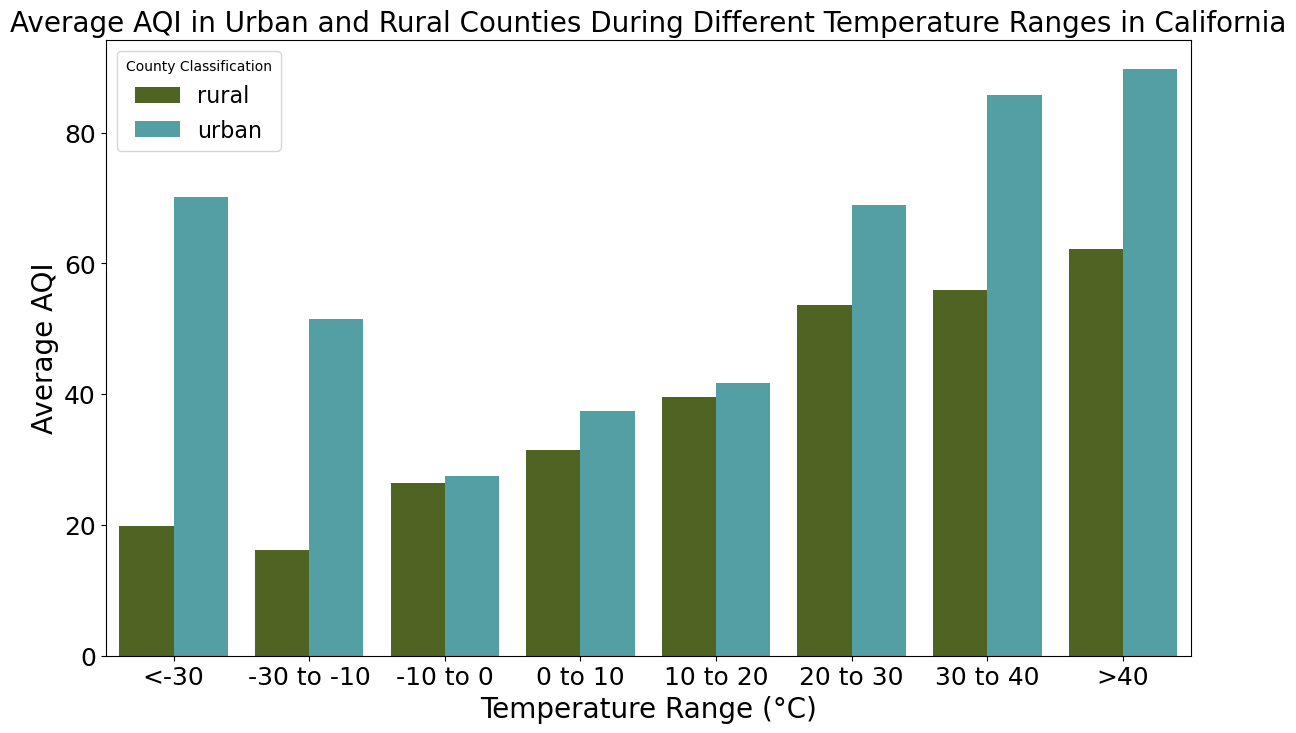

In [43]:
# Create temperature ranges (bins) in Celsius
temp_bins = [-50, -30, -10, 0, 10, 20, 30, 40, 50]
temp_labels = ['<-30', '-30 to -10', '-10 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 40', '>40']

cali_df['temp_range'] = pd.cut(cali_df['Temperature(C)'], bins=temp_bins, labels=temp_labels, include_lowest=True)

# Aggregate data to get the average AQI for each combination of temperature range and county classification
avg_aqi = cali_df.groupby(['temp_range', 'county_classification'])['AQI'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='temp_range', y='AQI', hue='county_classification', data=avg_aqi, palette=['#536F18', '#46ABB0'] )

plt.title('Average AQI in Urban and Rural Counties During Different Temperature Ranges in California', fontsize=20)
plt.xlabel('Temperature Range (°C)',fontsize=20)
plt.ylabel('Average AQI',fontsize=20)
plt.legend(title='County Classification',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)

# Save chart
plt.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\AQI_temp_ranges.png")

plt.show()

In [45]:
# Group data by date and county classification, then calculate the mean concentrations
polls_grouped_cali = cali_df.groupby([all_df['Date Local'].dt.year, 'county_classification']).agg(
    {'PM2_5(µg/m³ LC)':'mean', 'PM10 Tot_0-10um STP(μg/m3)':'mean', 'Ozone(ppm)':'mean', 'CO(ppm)':'mean', 'SO2(ppb)':'mean', 'NO2(ppb)':'mean'}).reset_index()


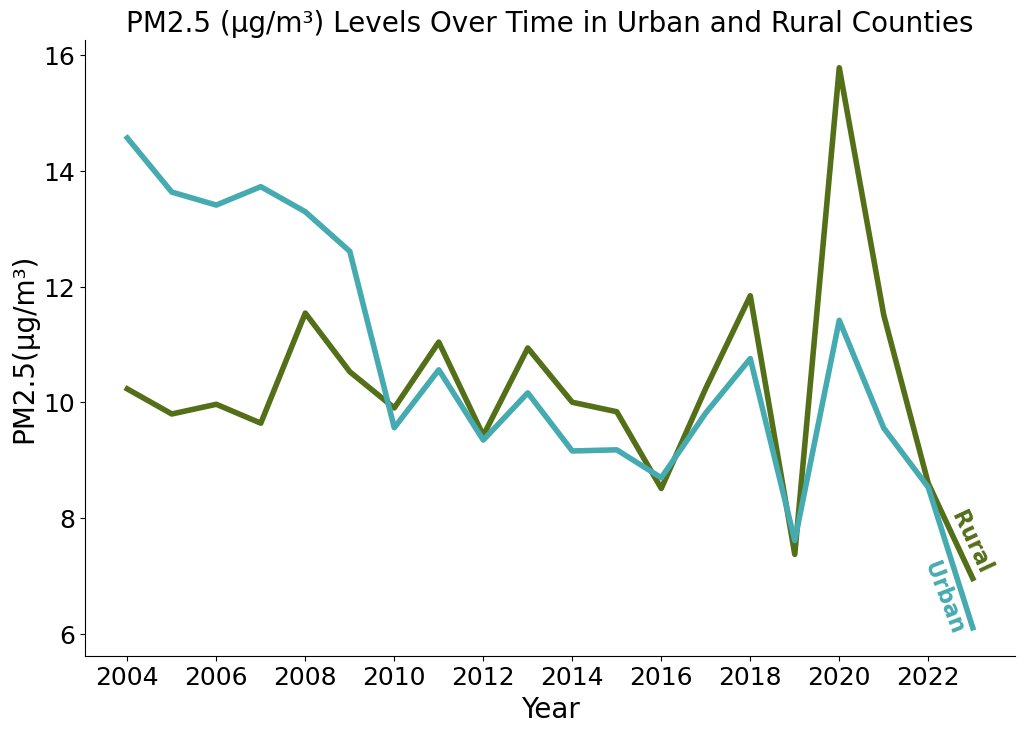

In [53]:
# ---PM2_5(µg/m³ LC)---
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['PM2_5(µg/m³ LC)'], label='Rural', color='#536F18', linewidth=4)
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['PM2_5(µg/m³ LC)'], label='Urban', color='#46ABB0', linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=2022.4, y=8.2, ax=ax, s="Rural", fontsize=16, fontweight="bold", va="top", ha="left", color='#536F18', rotation=295)
ax_text(x=2021.8, y=7.3, ax=ax, s="Urban", fontsize=16, fontweight="bold", va="top", ha="left", color='#46ABB0', rotation=291)

# Set x-axis ticks to be every 2 years
ax.set_xticks(np.arange(min(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']), max(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']) + 1, 2))

# Add y-axis label
ax.set_ylabel('PM2.5(µg/m³)',fontsize=20)

# Add x-axis label
ax.set_xlabel('Year',fontsize=20)

# Add title
ax.set_title('PM2.5 (µg/m³) Levels Over Time in Urban and Rural Counties',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Show the plot
plt.show()

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\PM2_5.png")

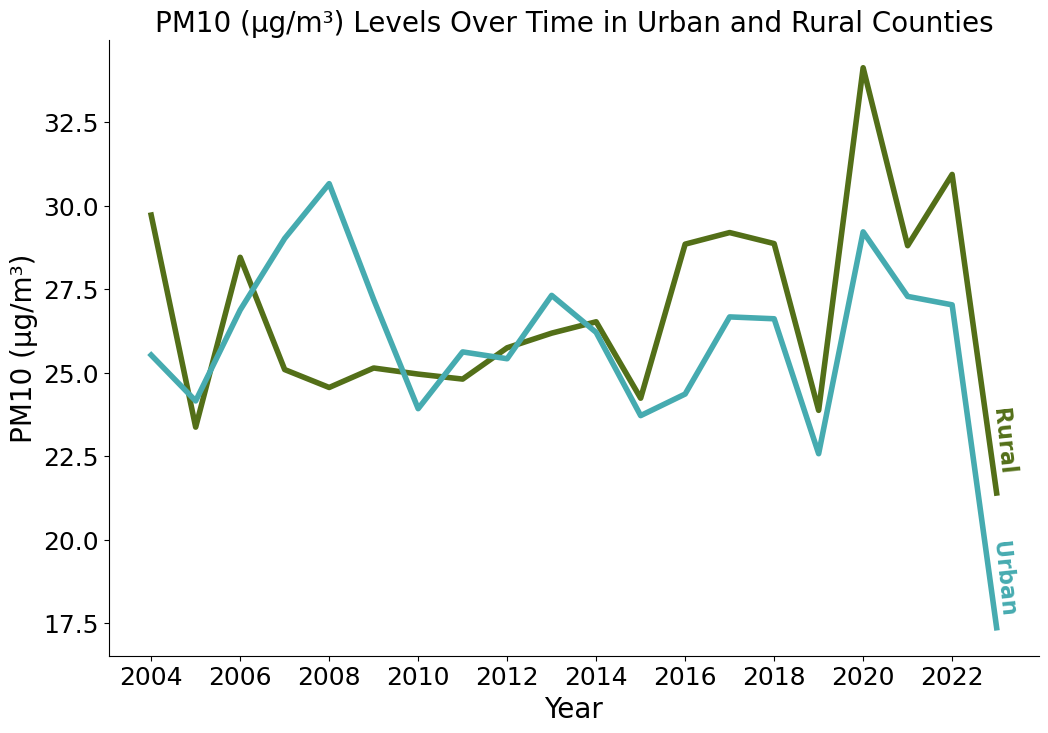

In [55]:
# ---PM10 Tot_0-10um STP(μg/m3)---
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['PM10 Tot_0-10um STP(μg/m3)'], label='Rural', color='#536F18', linewidth=4)
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['PM10 Tot_0-10um STP(μg/m3)'], label='Urban', color='#46ABB0', linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=2022.8, y=24, ax=ax, s="Rural", fontsize=16, fontweight="bold", va="top", ha="left", color='#536F18', rotation=276)
ax_text(x=2022.8, y=20, ax=ax, s="Urban", fontsize=16, fontweight="bold", va="top", ha="left", color='#46ABB0', rotation=276)

# Set x-axis ticks to be every 2 years
ax.set_xticks(np.arange(min(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']), max(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']) + 1, 2))

# Add y-axis label
ax.set_ylabel('PM10 (μg/m³)',fontsize=20)

# Add x-axis label
ax.set_xlabel('Year',fontsize=20)

# Add title
ax.set_title('PM10 (μg/m³) Levels Over Time in Urban and Rural Counties',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Show the plot
plt.show()

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\PM10.png")

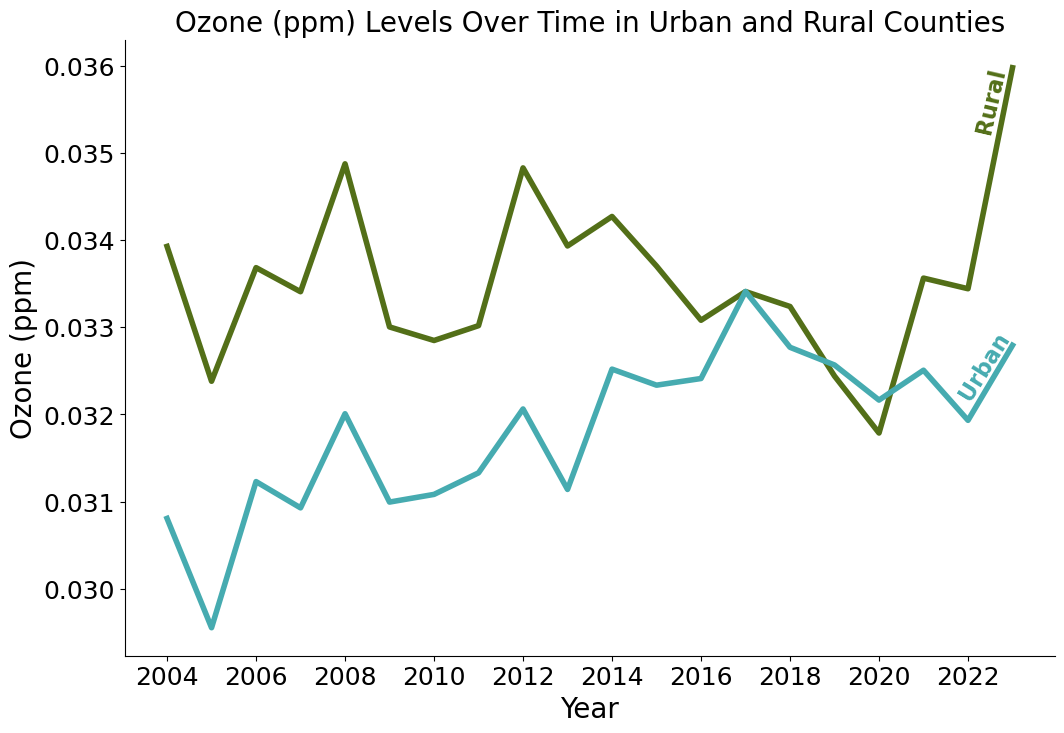

In [59]:
# ---Ozone(ppm)---
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Ozone(ppm)'], label='Rural', color='#536F18', linewidth=4)
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['Ozone(ppm)'], label='Urban', color='#46ABB0', linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=2022.1, y=0.036, ax=ax, s="Rural", fontsize=16, fontweight="bold", va="top", ha="left", color='#536F18', rotation=77)
ax_text(x=2021.7, y=0.033, ax=ax, s="Urban", fontsize=16, fontweight="bold", va="top", ha="left", color='#46ABB0', rotation=58)

# Set x-axis ticks to be every 2 years
ax.set_xticks(np.arange(min(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']), max(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']) + 1, 2))

# Add y-axis label
ax.set_ylabel('Ozone (ppm)',fontsize=20)

# Add x-axis label
ax.set_xlabel('Year',fontsize=20)

# Add title
ax.set_title('Ozone (ppm) Levels Over Time in Urban and Rural Counties',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Show the plot
plt.show()

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\ozone.png")

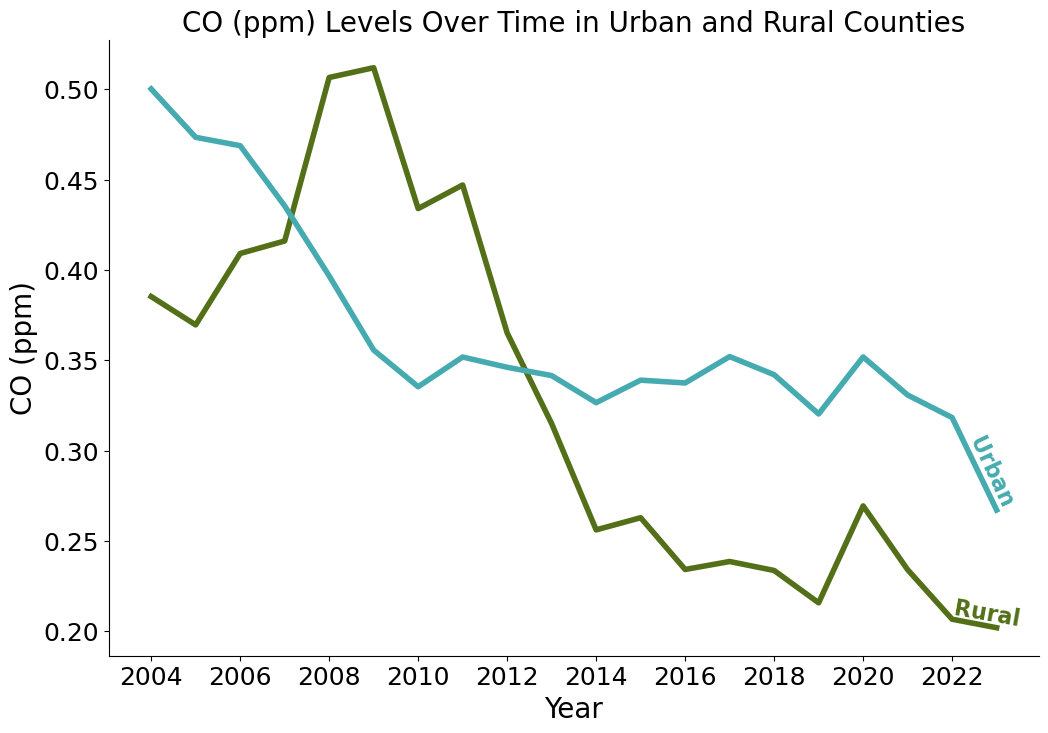

In [61]:
# ---CO(ppm)---
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['CO(ppm)'], label='Rural', color='#536F18', linewidth=4)
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['CO(ppm)'], label='Urban', color='#46ABB0', linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=2022.0, y=0.219, ax=ax, s="Rural", fontsize=16, fontweight="bold", va="top", ha="left", color='#536F18', rotation=350)
ax_text(x=2022.28, y=0.31, ax=ax, s="Urban", fontsize=16, fontweight="bold", va="top", ha="left", color='#46ABB0', rotation=295)

# Set x-axis ticks to be every 2 years
ax.set_xticks(np.arange(min(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']), max(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']) + 1, 2))

# Add y-axis label
ax.set_ylabel('CO (ppm)',fontsize=20)

# Add x-axis label
ax.set_xlabel('Year',fontsize=20)

# Add title
ax.set_title('CO (ppm) Levels Over Time in Urban and Rural Counties',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Show the plot
plt.show()

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\CO.png")

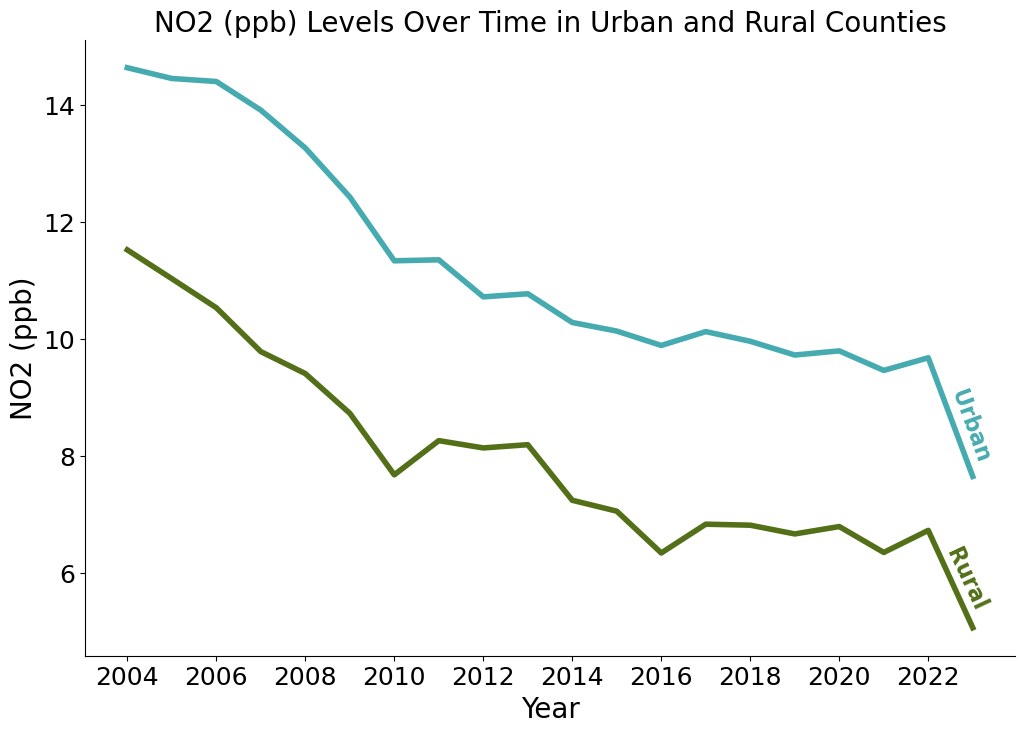

In [62]:
# ---NO2(ppb)---
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['NO2(ppb)'], label='Rural', color='#536F18', linewidth=4)
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['NO2(ppb)'], label='Urban', color='#46ABB0', linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=2022.3, y=6.5, ax=ax, s="Rural", fontsize=16, fontweight="bold", va="top", ha="left", color='#536F18', rotation=295)
ax_text(x=2022.4, y=9.2, ax=ax, s="Urban", fontsize=16, fontweight="bold", va="top", ha="left", color='#46ABB0', rotation=290)

# Set x-axis ticks to be every 2 years
ax.set_xticks(np.arange(min(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']), max(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']) + 1, 2))

# Add y-axis label
ax.set_ylabel('NO2 (ppb)',fontsize=20)

# Add x-axis label
ax.set_xlabel('Year',fontsize=20)

# Add title
ax.set_title('NO2 (ppb) Levels Over Time in Urban and Rural Counties',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Show the plot
plt.show()

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\NO2.png")

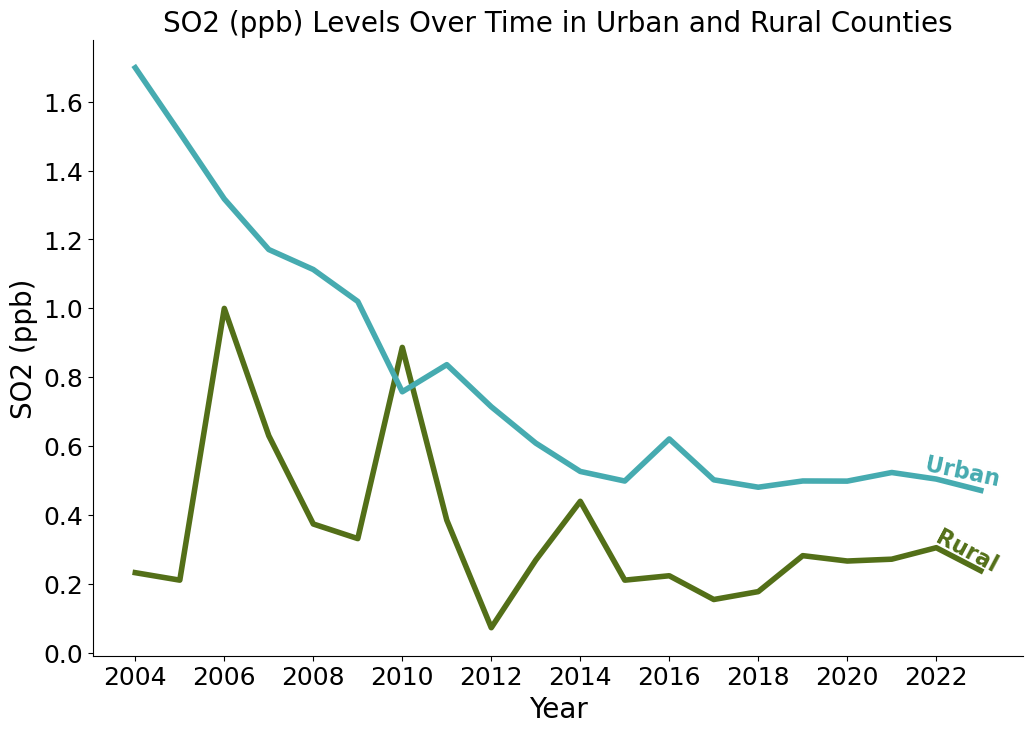

In [71]:
# ---SO2(ppb)---
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['SO2(ppb)'], label='Rural', color='#536F18', linewidth=4)
ax.plot(polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['Date Local'], polls_grouped_cali[polls_grouped_cali['county_classification']=='urban']['SO2(ppb)'], label='Urban', color='#46ABB0', linewidth=4)
ax.spines[["top", "right"]].set_visible(False)

# Custom legend
ax_text(x=2021.9, y=0.37, ax=ax, s="Rural", fontsize=16, fontweight="bold", va="top", ha="left", color='#536F18', rotation=332)
ax_text(x=2021.7, y=0.58, ax=ax, s="Urban", fontsize=16, fontweight="bold", va="top", ha="left", color='#46ABB0', rotation=348)

# Set x-axis ticks to be every 2 years
ax.set_xticks(np.arange(min(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']), max(polls_grouped_cali[polls_grouped_cali['county_classification']=='rural']['Date Local']) + 1, 2))

# Add y-axis label
ax.set_ylabel('SO2 (ppb)',fontsize=20)

# Add x-axis label
ax.set_xlabel('Year',fontsize=20)

# Add title
ax.set_title('SO2 (ppb) Levels Over Time in Urban and Rural Counties',fontsize=20)

#Set the tick parameters for larger tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Show the plot
plt.show()

# Save chart
fig.savefig(r"C:\Users\stlva\Google Drive\Big blue data academy\SO2.png")